In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
crashes = pd.read_csv('./archive/crashes.csv')
people = pd.read_csv('./archive/people.csv')
vehicles = pd.read_csv('./archive/vehicles.csv')

/var/folders/xk/dk_8xcq91w902vjjj8bl0jvm0000gn/T/ipykernel_7033/2083127299.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv('./archive/vehicles.csv')


In [3]:
crashes.head()


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05T19:05:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,NOT APPLICABLE,2,INCAPACITATING INJURY,3.0,0.0,19,3,9,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,2023-09-22T18:45:00.000Z,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,FOLLOWING TOO CLOSELY,2,NO INDICATION OF INJURY,0.0,0.0,18,6,9,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29T14:45:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",4,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.85412,-87.665902
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,2023-08-09T23:00:00.000Z,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,0.0,23,4,8,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18T12:50:00.000Z,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,DISTRACTION - FROM INSIDE VEHICLE,2,NONINCAPACITATING INJURY,1.0,0.0,12,6,8,NaN,NaN


In [4]:
people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,PHYSICAL_CONDITION,BAC_RESULT
0,O1304796,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239150.0,2022-03-25T05:10:00.000Z,CHICAGO,IL,60641,M,28.0,IL,D,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
1,O1304797,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239154.0,2022-03-25T05:10:00.000Z,CHICAGO,IL,60651,M,27.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
2,O1304798,DRIVER,91a50c583a041e524a0807626ebcc57cc302a97270d160...,1239149.0,2022-03-25T04:45:00.000Z,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,UNKNOWN,TEST NOT OFFERED
3,O1304802,DRIVER,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,1239156.0,2022-03-25T04:54:00.000Z,SKOKIE,IL,60076,F,29.0,IL,D,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,OTHER,IMPAIRED - DRUGS,TEST NOT OFFERED
4,O1304805,DRIVER,333437e5d862419154c01b6583c662385867e7efc8faf8...,1239155.0,2022-03-25T05:47:00.000Z,NEW IBERIA,LA,70563,M,58.0,OK,A,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED


In [5]:
vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
0,1727162,f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...,2023-12-21T08:57:00.000Z,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,2023-12-06T15:24:00.000Z,1,DRIVER,1634931.0,NISSAN,SENTRA,IL,2009,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT
2,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2023-12-06T16:00:00.000Z,2,DRIVER,1634978.0,CHRYSLER,SEBRING,IL,2010,NONE,PASSENGER,PERSONAL,S,PASSING/OVERTAKING,1.0,REAR-RIGHT-CORNER
3,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,2023-12-06T16:30:00.000Z,1,DRIVER,1634948.0,SUBARU,OUTBACK,IL,2015,UNKNOWN,PASSENGER,PERSONAL,W,TURNING RIGHT,1.0,FRONT
4,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10T12:12:00.000Z,1,DRIVER,1637401.0,TOYOTA,RAV4,IL,2018,UNKNOWN,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,SIDE-LEFT-FRONT


In [6]:
record = crashes.merge(vehicles, on='CRASH_RECORD_ID')
record = record.merge(people, on='CRASH_RECORD_ID')

record.head()

,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,PHYSICAL_CONDITION,BAC_RESULT
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05T19:05:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,51.0,IL,A,SAFETY BELT USED,"DEPLOYED, FRONT",NONE,NONINCAPACITATING INJURY,NONE,NORMAL,TEST NOT OFFERED
1,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05T19:05:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,36.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,EMERGENCY VEHICLE ON CALL,NORMAL,TEST NOT OFFERED
2,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05T19:05:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,22.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONINCAPACITATING INJURY,NaN,NaN,NaN
3,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05T19:05:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,55.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,INCAPACITATING INJURY,NaN,NaN,NaN
4,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,2023-09-05T19:05:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,...,46.0,NaN,NaN,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN


In [7]:
people.dropna()
vehicles.dropna()
crashes.dropna()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29T14:45:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",4,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.854120,-87.665902
13,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,2023-07-29T14:30:00.000Z,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,...,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.809781,-87.594213
14,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,2023-07-29T00:50:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,0.0,0,7,7,41.899225,-87.696642
19,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,2023-08-13T10:10:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,3,NO INDICATION OF INJURY,0.0,0.0,10,1,8,41.975853,-87.709134
20,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,2023-08-09T19:55:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,19,4,8,41.758246,-87.626522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304902,bc2876dcd7c4098806301cb646232eb8f65c86a4f418b7...,2023-05-28T01:20:00.000Z,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,UNKNOWN,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,0.0,1,1,5,41.851497,-87.719932
304903,45d62ddd4e4b5572d253cc072b3927afc15489728f1ba8...,2023-08-05T13:00:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,...,FAILING TO YIELD RIGHT-OF-WAY,2,NO INDICATION OF INJURY,0.0,0.0,13,7,8,41.798505,-87.723459
304904,080a7c455bddc21abc5f396a4ea8db9a4387a154680fcc...,2022-03-15T02:00:00.000Z,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,2,3,3,41.785636,-87.614314
304905,0c3ba5ebe2928b85f42ad69485a11977fef61a3a5b6b82...,2023-08-18T22:00:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,NOT APPLICABLE,3,NO INDICATION OF INJURY,0.0,0.0,22,6,8,41.967890,-87.760938


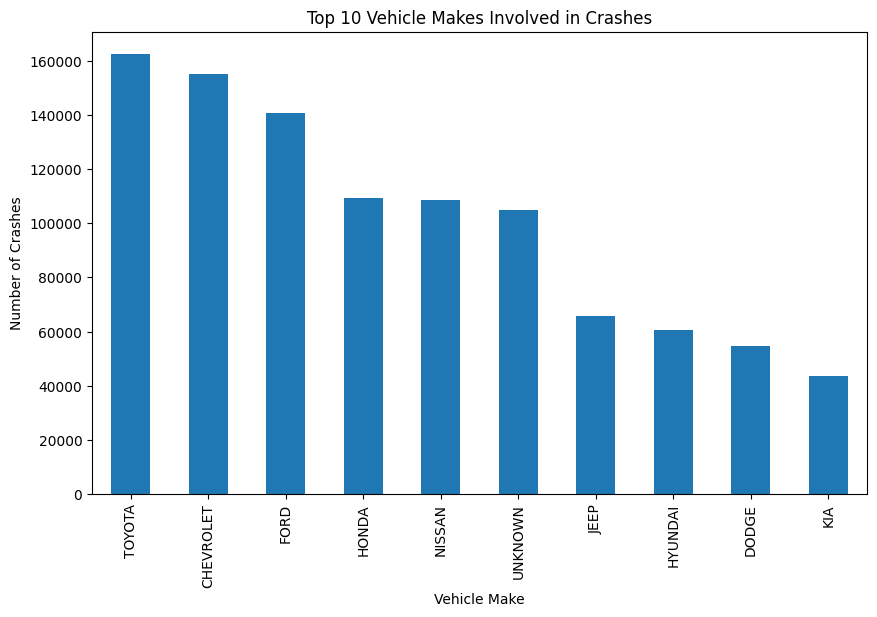

In [10]:
#plot the vehicle MAKE vs the number of crashes
plt.figure(figsize=(10, 6))
record['MAKE'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes Involved in Crashes')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Crashes')
plt.show()


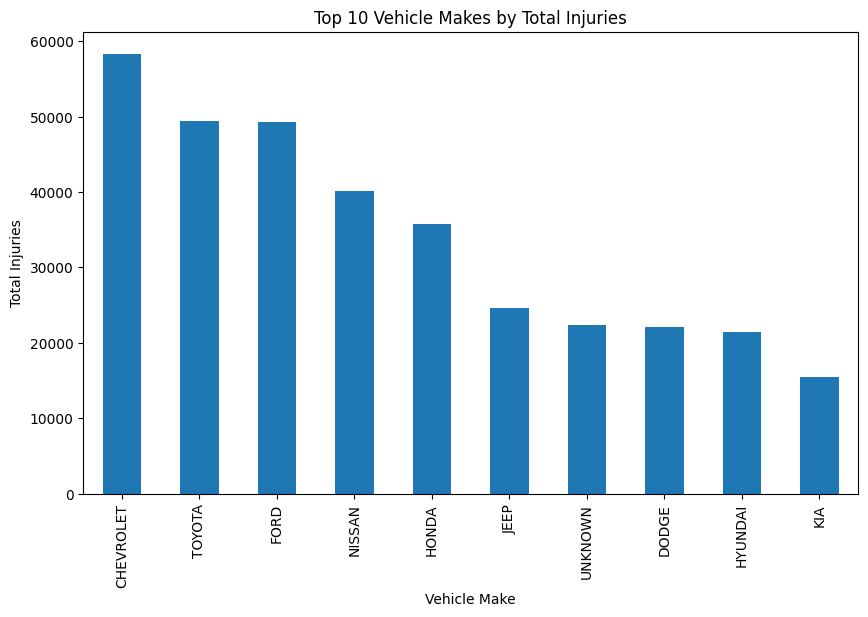

In [11]:
#plot the make vs the INJURIES_TOTAL
plt.figure(figsize=(10, 6))
record.groupby('MAKE')['INJURIES_TOTAL'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Makes by Total Injuries')
plt.xlabel('Vehicle Make')
plt.ylabel('Total Injuries')
plt.show()

In [18]:
#print all types of PHYSICAL_CONDITION in the dataset
print(record['MOST_SEVERE_INJURY'].unique())
record.dropna()

['INCAPACITATING INJURY' 'NO INDICATION OF INJURY'
 'NONINCAPACITATING INJURY' 'REPORTED, NOT EVIDENT' 'FATAL' nan]


,CRASH_RECORD_ID,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,PHYSICAL_CONDITION,BAC_RESULT
99,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,2023-08-13T10:10:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,41.0,IL,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
103,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,2023-08-13T10:10:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,41.0,IL,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
107,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,2023-08-13T10:10:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,41.0,IL,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
109,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,2023-08-09T19:55:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,33.0,IL,D,USAGE UNKNOWN,"DEPLOYED, FRONT",NONE,NONINCAPACITATING INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED
110,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,2023-08-09T19:55:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,38.0,IL,B,USAGE UNKNOWN,DID NOT DEPLOY,UNKNOWN,NONINCAPACITATING INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406864,0c3ba5ebe2928b85f42ad69485a11977fef61a3a5b6b82...,2023-08-18T22:00:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
1406866,0c3ba5ebe2928b85f42ad69485a11977fef61a3a5b6b82...,2023-08-18T22:00:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,16.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED
1406867,0c3ba5ebe2928b85f42ad69485a11977fef61a3a5b6b82...,2023-08-18T22:00:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,26.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NORMAL,TEST NOT OFFERED
1406868,0c3ba5ebe2928b85f42ad69485a11977fef61a3a5b6b82...,2023-08-18T22:00:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,...,16.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,NORMAL,TEST NOT OFFERED


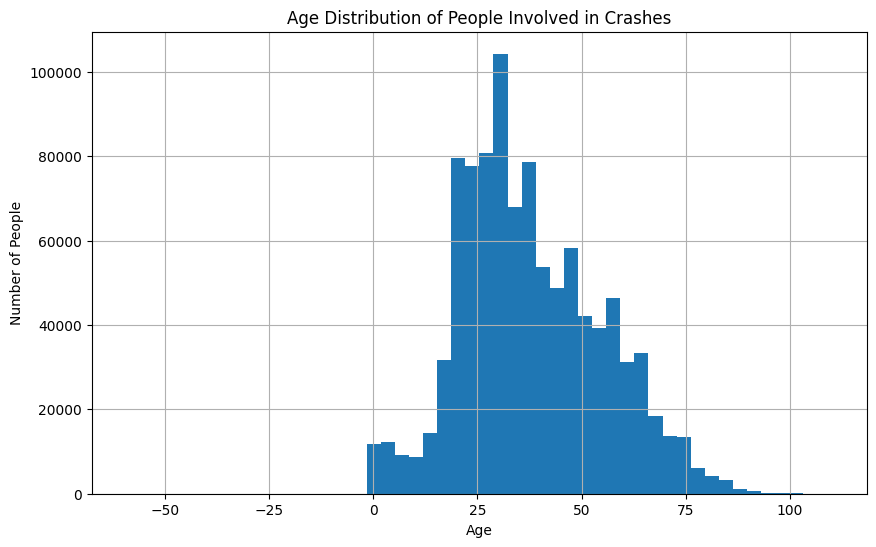

In [52]:
#Plot age by generation vs the number of crashes but start at
plt.figure(figsize=(10, 6))
record['AGE'].hist(bins=50)
record['AGE'] = 2021 - record['AGE']
plt.title('Age Distribution of People Involved in Crashes')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

